# Vanishing Gradients Problem Using the ReLU

![alt text](kandinsky_nn.png "Title")

> The vanishing gradients problem describes a situation where a deep multilayer feed-forward network or a recurrent neural network is unable to propagate useful gradient information from the output end of the model back to the layers near the input end of the model.

> The result can be an inability for models with many layers to learn on a dataset or to prematurely converge, both situations would result in a poor solution.

![alt text](tanh.png "Title")

![alt text](relu.png "Title")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


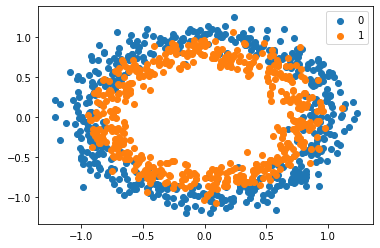

In [5]:
# scatter plot of circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# Load the TensorBoard notebook extension
%load_ext tensorboard

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [2]:
# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot

Using TensorFlow backend.


In [6]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X)

In [7]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

#### tanh activation model

> The model has an input layer with 2 inputs, for the two variables in the dataset, one hidden layer with 5 nodes, and an output layer with one node to predict the class probability.

> Here we are using the hyperbolic tangent activation function in hidden layers, this was best practices in the 1990's and 2000's.
>> *The weights are initialized randomly from the range [0.0 to 1.0]*

In [8]:
# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

> Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

> For example: predicting a probability of .012 when the actual observation label is 1 would be a bad and result in a high loss value. A perfect model would have a log loss of 0.

In [9]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [11]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.804, Test: 0.806


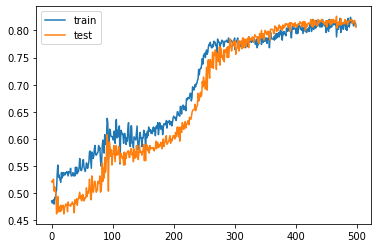

In [12]:
# plot the training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

---

## Deep MLP model for Two Circles Problem, using tanh

> Deep models using the **tanh** activation function do not train easily, and much of this poor performance in blamed on the **vanishing gradient problem**.

> #### Increase the number of hidden layers from 1 to 5

In [13]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [14]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

In [15]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [17]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.576, Test: 0.590


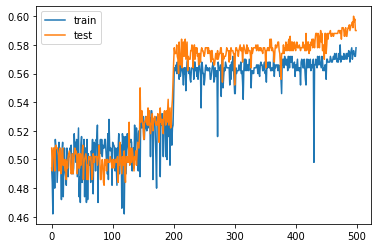

In [18]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

> When we use **tanh** with a Deep MLP model the accuracy of our training and test sets are around 50 percent. This suggests that the model, as configured, could not learn or generalize a solution. 

---

## Deep MLP model for Two Circles problem, using ReLU

> The rectified linear activation function has taken the place of the hyperbolic tangent activation function as the preferred default with developing MLP networks. This also holds true for other network types, such as CNN's.

> The advantage of the **ReLU** activation function is that it looks and acts like a linear function. This makes is easier to train and less likely to saturate. 

> However, the **ReLU** is in fact a nonlinear function that forces negative inputs to the value 0. 

> The afformentioned information is on the of the possible approaches of addressing the vanishing gradients problem when training deep models.

In [19]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [20]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

> Note that we have kept 5 layers, but changed our activation function to **ReLU**.

> **He_uniform** It is good practice to use the He weight initialization scheme. The aim is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. [Weight Initialization](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79) 

In [21]:
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

In [24]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.812, Test: 0.820


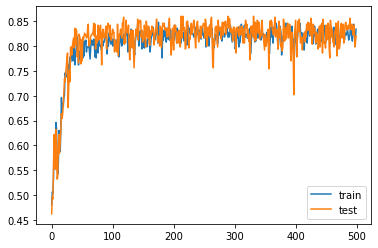

In [25]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

> Changing the **tanh** activation function to the **ReLU** function dramatically increases our accuracy. We went from approximately *50 percent* to approximately *85 percent*...by doing nothing more than changing the activation function.

> The model appears to rapidly learn the problem. The solution converges in about 100 epochs.